# Test 2

Step 1 (experiment) - Record an image with nothing, light off, dark room, and call this image "background.png"
	
Step 2 (experiment) - Place a single led on the optical axis (the tape) at 30cm from the camera, record the image (name depth_030.png), then at 40cm, then record (name depth_040.png), etc, etc every 10cm until you reach the end of the table.

Step 3 (numerics) - For each image depth <n>, remove the mean of the image depth_<n>.png, compute the autocorrelation (as above); let's say you store it in an array named depth_autoco[n] 
	
Step 4 (numerics) - For each <n>, compute the ratio between the height of the peak of depth_autoco[n], and the mean of all the rest of the image but on a little disk of 2 pixel radius centered on the peak. 
	
Step 5 (numerics) - Plot the value of that ratio versus <n>
	
Step 6 (numerics) - Repeat steps 3-5 but before subtracting the mean to each depth_<n>.png, remove "background.png" from them, and plot the same plot.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

## Step 3

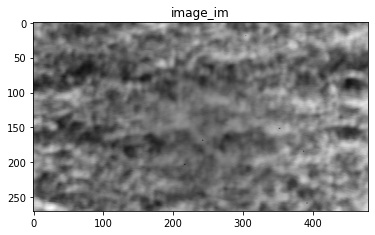

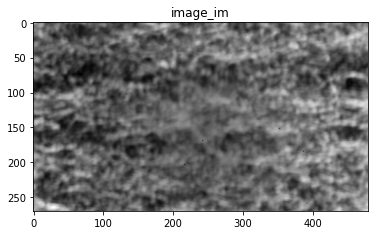

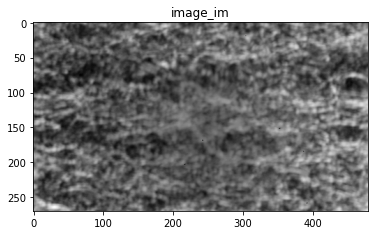

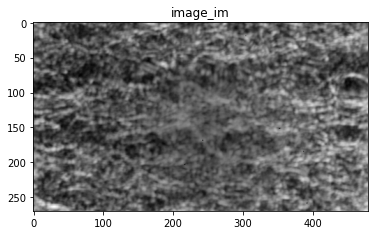

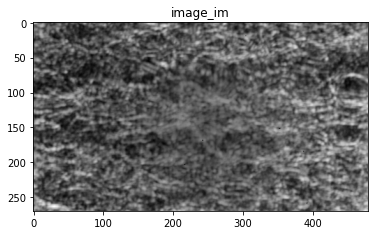

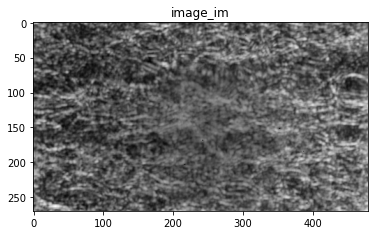

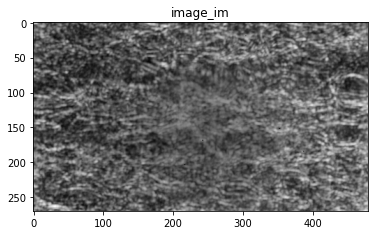

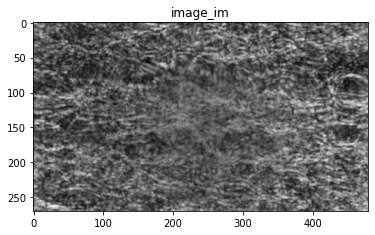

In [12]:
#Import image
depth_030 = Image.open('from_camera/test02/depth_030.png')
realsize=depth_030.size
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)

def image_open_mean_show(name,new_size,colormap):
    location='from_camera/test02/'+name+'.png'
    image_im = Image.open(location)
    image_im=image_im.resize(new_size,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    image_im = image_im - image_im.mean()
    plt.imshow(image_im,cmap=colormap)
    plt.title('image_im')
    plt.show()
    return image_im

depth_030=image_open_mean_show('depth_030',newsize,'gray')
depth_040=image_open_mean_show('depth_040',newsize,'gray')
depth_050=image_open_mean_show('depth_050',newsize,'gray')
depth_060=image_open_mean_show('depth_060',newsize,'gray')
depth_070=image_open_mean_show('depth_070',newsize,'gray')
depth_080=image_open_mean_show('depth_080',newsize,'gray')
depth_090=image_open_mean_show('depth_090',newsize,'gray')
depth_100=image_open_mean_show('depth_100',newsize,'gray')

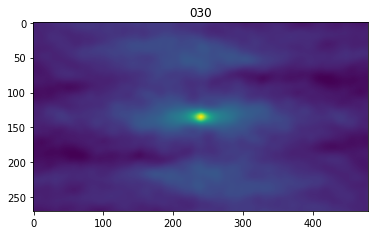

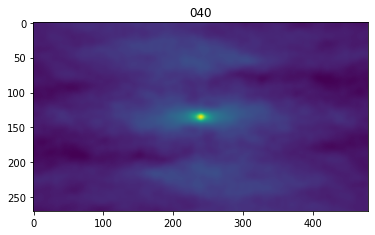

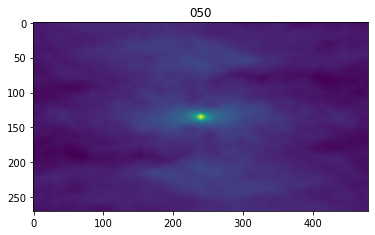

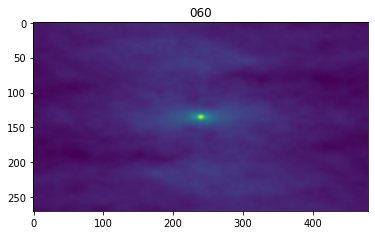

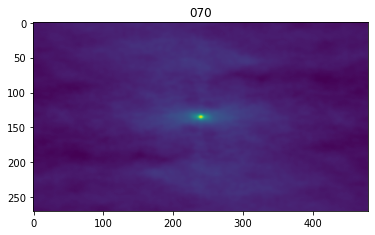

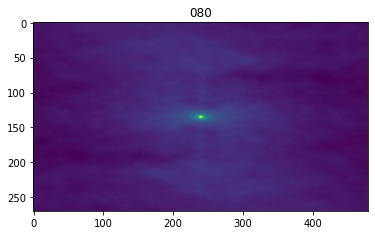

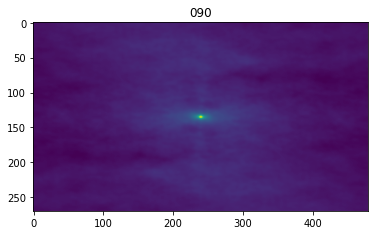

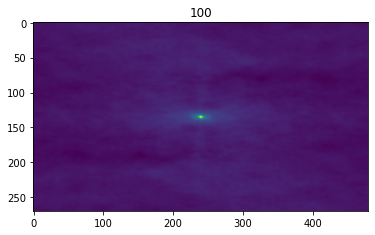

In [13]:
#Autocorrelation
auto_030=signal.fftconvolve(depth_030,np.flip(depth_030),mode='same')
auto_040=signal.fftconvolve(depth_040,np.flip(depth_040),mode='same')
auto_050=signal.fftconvolve(depth_050,np.flip(depth_050),mode='same')
auto_060=signal.fftconvolve(depth_060,np.flip(depth_060),mode='same')
auto_070=signal.fftconvolve(depth_070,np.flip(depth_070),mode='same')
auto_080=signal.fftconvolve(depth_080,np.flip(depth_080),mode='same')
auto_090=signal.fftconvolve(depth_090,np.flip(depth_090),mode='same')
auto_100=signal.fftconvolve(depth_100,np.flip(depth_100),mode='same')
    

plt.imshow(auto_030)
plt.title('030')
plt.show()
plt.imshow(auto_040)
plt.title('040')
plt.show()
plt.imshow(auto_050)
plt.title('050')
plt.show()
plt.imshow(auto_060)
plt.title('060')
plt.show()
plt.imshow(auto_070)
plt.title('070')
plt.show()
plt.imshow(auto_080)
plt.title('080')
plt.show()
plt.imshow(auto_090)
plt.title('090')
plt.show()
plt.imshow(auto_100)
plt.title('100')
plt.show()

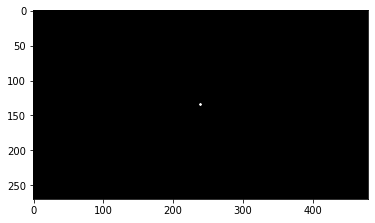

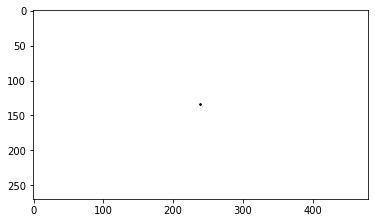

In [14]:
def areas_disk(radi,sx,sy):
    disk_in = np.zeros((sy, sx), dtype=float)
    disk_out = np.ones((sy, sx), dtype=float)
    rr, cc = draw.disk(((sy-1)/2,(sx-1)/2),radi)
    disk_in[rr, cc] = 1
    disk_out[rr, cc] = 0
    return (disk_in, disk_out)

radius=2 #Here we can define the radius of the circle
[size_y,size_x]=auto_030.shape
[area_in, area_out] =areas_disk(radius,size_x,size_y)

plt.imshow(area_in, cmap='gray')
plt.show()

plt.imshow(area_out, cmap='gray')
plt.show()

## Step 4

In [15]:
def fun_ratio(autocon,radi):
    [sy,sx]=autocon.shape
    max_=np.amax(autocon)
    [max_y,max_x]=np.where(autocon==max_)
    max_y=float(max_y)
    max_x=float(max_x)
    disk_mask = np.ones((sy, sx), dtype=float)
    rr, cc = draw.disk((max_y,max_x),radi)
    disk_mask[rr, cc] = 0
    autocon_masked=disk_mask*autocon
    sum_nz=sum(sum(autocon_masked))
    number_nz=autocon.size-len(rr)
    average_nz=sum_nz/number_nz
    ratio_nz=max_/average_nz
    return(ratio_nz)

radii=5
ratio_030=fun_ratio(auto_030,radii)
ratio_040=fun_ratio(auto_040,radii)
ratio_050=fun_ratio(auto_050,radii)
ratio_060=fun_ratio(auto_060,radii)
ratio_070=fun_ratio(auto_070,radii)
ratio_080=fun_ratio(auto_080,radii)
ratio_090=fun_ratio(auto_090,radii)
ratio_100=fun_ratio(auto_100,radii)

depth_array=np.array([30,40,50,60,70,80,90,100])
ratio_array=np.array([ratio_030,ratio_040,ratio_050,ratio_060,ratio_070,ratio_080,ratio_090,ratio_100])

## Step 5

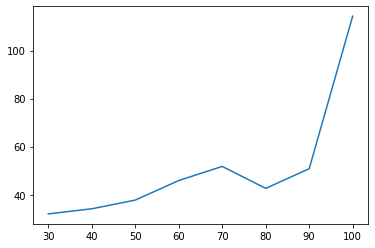

In [16]:
plt.plot(depth_array,ratio_array)
plt.show()
#Since I can't center the images, the next step is to generate the circle arround the maximum peak

## Step 6

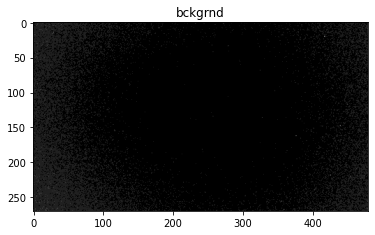

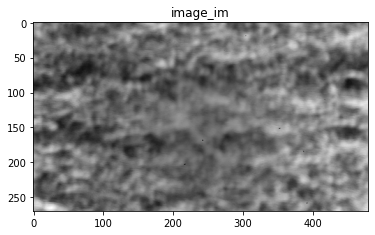

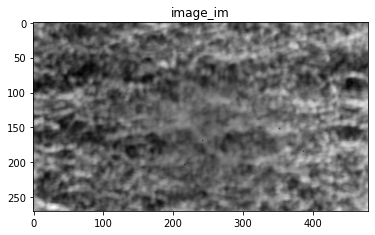

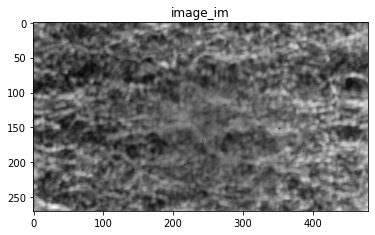

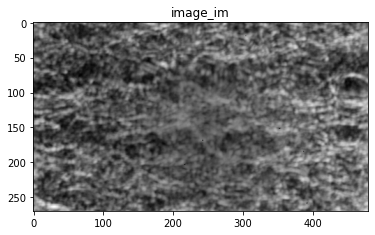

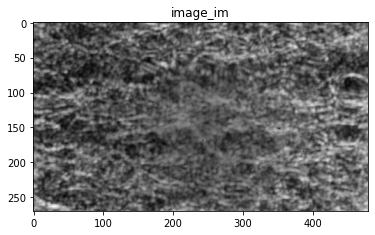

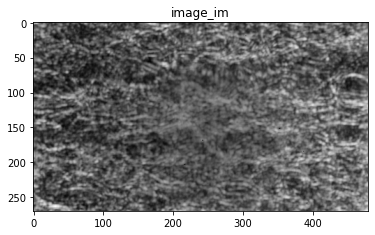

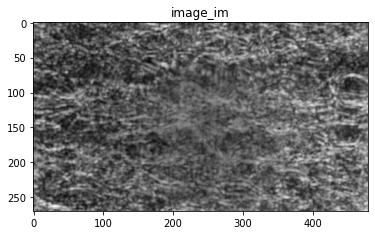

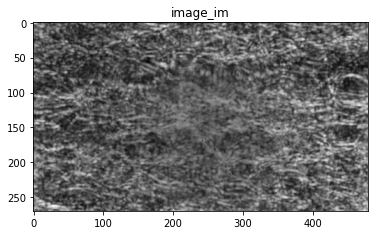

In [17]:
#Import image
background = Image.open('from_camera/test02/background1.png')
background=background.resize(newsize,Image.ANTIALIAS)
background = np.array(background,dtype=float)
background = background[:, :, 0]

#Get rid of the offset
# print('Mean:',background.mean())
# background = background - background.mean()
# print('Mean:',background.mean())

#Print image
plt.imshow(background,cmap='gray')
plt.title('bckgrnd')
plt.show()


def image_open_background_mean_show(name,new_size,colormap,bck):
    location='from_camera/test02/'+name+'.png'
    image_im = Image.open(location)
    image_im=image_im.resize(new_size,Image.ANTIALIAS)
    image_im = np.array(image_im,dtype=float)
    image_im = image_im[:, :, 0]
    image_im = image_im - bck
    image_im = image_im - image_im.mean()
    plt.imshow(image_im,cmap=colormap)
    plt.title('image_im')
    plt.show()
    return image_im

depth_030=image_open_background_mean_show('depth_030',newsize,'gray',background)
depth_040=image_open_background_mean_show('depth_040',newsize,'gray',background)
depth_050=image_open_background_mean_show('depth_050',newsize,'gray',background)
depth_060=image_open_background_mean_show('depth_060',newsize,'gray',background)
depth_070=image_open_background_mean_show('depth_070',newsize,'gray',background)
depth_080=image_open_background_mean_show('depth_080',newsize,'gray',background)
depth_090=image_open_background_mean_show('depth_090',newsize,'gray',background)
depth_100=image_open_background_mean_show('depth_100',newsize,'gray',background)

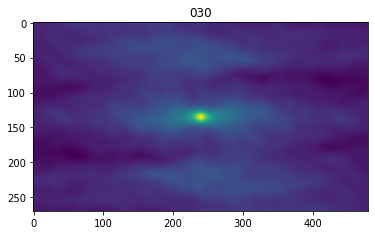

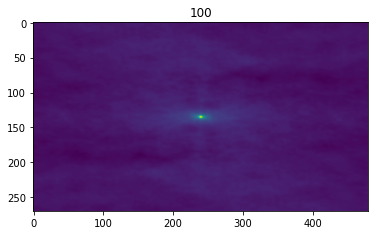

In [18]:
#Autocorrelation
auto_030=signal.fftconvolve(depth_030,np.flip(depth_030),mode='same')
auto_040=signal.fftconvolve(depth_040,np.flip(depth_040),mode='same')
auto_050=signal.fftconvolve(depth_050,np.flip(depth_050),mode='same')
auto_060=signal.fftconvolve(depth_060,np.flip(depth_060),mode='same')
auto_070=signal.fftconvolve(depth_070,np.flip(depth_070),mode='same')
auto_080=signal.fftconvolve(depth_080,np.flip(depth_080),mode='same')
auto_090=signal.fftconvolve(depth_090,np.flip(depth_090),mode='same')
auto_100=signal.fftconvolve(depth_100,np.flip(depth_100),mode='same')
    

plt.imshow(auto_030)
plt.title('030')
plt.show()
plt.imshow(auto_100)
plt.title('100')
plt.show()

In [19]:
radii=5
ratio_030=fun_ratio(auto_030,radii)
ratio_040=fun_ratio(auto_040,radii)
ratio_050=fun_ratio(auto_050,radii)
ratio_060=fun_ratio(auto_060,radii)
ratio_070=fun_ratio(auto_070,radii)
ratio_080=fun_ratio(auto_080,radii)
ratio_090=fun_ratio(auto_090,radii)
ratio_100=fun_ratio(auto_100,radii)

depth_array=np.array([30,40,50,60,70,80,90,100])
ratio_array=np.array([ratio_030,ratio_040,ratio_050,ratio_060,ratio_070,ratio_080,ratio_090,ratio_100])

print(1+1)

2


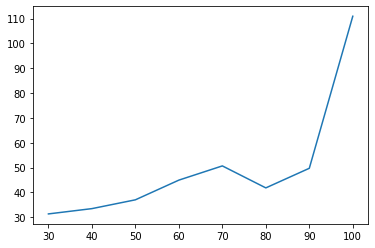

In [20]:
plt.plot(depth_array,ratio_array)
plt.show()